## Connect Google Drive and HuggingFace

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
! pip install huggingface_hub

# use on colab, on local run on terminal
# ! huggingface-cli login

In [ ]:
# %cd /content/drive/MyDrive/DAAM/
%cd '/Users/duyennguyen/Downloads/daam-0.1.0/UngDungDAAM_Result'

## Install libraries

In [2]:
# ! pip install diffusers #==0.3.0
# ! pip install transformers scipy ftfy
# ! pip install accelerate
# ! pip install transformers #==4.24.0
! pip install datasets
! pip install daam==0.1.0
! pip install stanza

## Daam requirement.txt
! pip install scikit-image
! pip install diffusers==0.16.1
! pip install spacy
! pip install gradio
! pip install ftfy
! pip install transformers==4.27.4
! pip install pandas
! pip install numba
! pip install nltk
! pip install inflect
! pip install joblib
! pip install accelerate==0.18.0
! pip install scipy

In [ ]:
## fix error diffusers version <=0.4.0
# import diffusers
# print(diffusers.__version__)
# # ! pip install --upgrade diffusers transformers scipy

## Load pokemon dataset
https://huggingface.co/datasets/lambdalabs/pokemon-blip-captions

In [ ]:
# from datasets import load_dataset_builder
# ds_builder = load_dataset_builder("lambdalabs/pokemon-blip-captions")

# ds_builder.info.description

# ds_builder.info.features

## Load pokemon model
https://huggingface.co/lambdalabs/sd-pokemon-diffusers

In [10]:
import torch
from diffusers import StableDiffusionPipeline
from torch import autocast

# # use GPU
# pipe = StableDiffusionPipeline.from_pretrained("lambdalabs/sd-pokemon-diffusers", torch_dtype=torch.float16)
# pipe = pipe.to("cuda")

# use CPU
pipe = StableDiffusionPipeline.from_pretrained("lambdalabs/sd-pokemon-diffusers")
del pipe.vae.encoder # remove VAE encoder as it's not needed
# pipe = pipe.to("cpu")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


## Generate images based on pp

In [ ]:
# import numpy as np
# prompt = "a drawing of a blue and yellow dragon"
# scale = 10
# n_samples = 4

# # Sometimes the nsfw checker is confused by the Pokémon images, you can disable
# # it at your own risk here
# disable_safety = False

# if disable_safety:
#   def null_safety(images, **kwargs):
#       return images, False
#   pipe.safety_checker = null_safety

# with autocast("cuda"):
#   images = pipe(n_samples*[prompt], guidance_scale=scale).images

# # for idx, im in enumerate(images):
# #   im.save(f"{idx+4:06}.png")


100%|██████████| 50/50 [03:54<00:00,  4.69s/it]


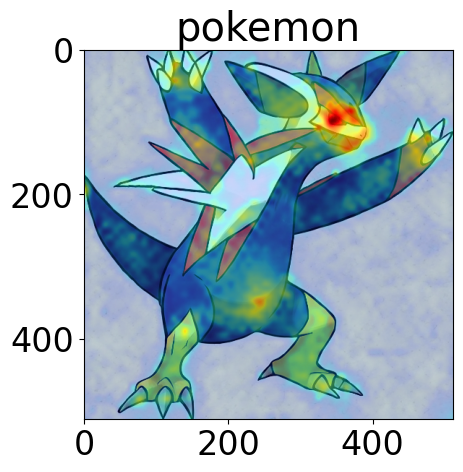

In [12]:
from tqdm import tqdm
from pathlib import Path
from daam import set_seed, trace

n_samples = 4
prompt = 'pokemon'
scale = 10

for idx in range(4):
    output_folder = Path('/Users/duyennguyen/Downloads/daam-0.1.0/UngDungDAAM_Result')
    with trace(pipe) as tc:
        out = pipe(prompt, guidance_scale=scale)
        # out = pipe(prompt, num_inference_steps=10, generator=set_seed(idx))
        exp = tc.to_experiment(output_folder, id=str(idx), seed=idx)
        exp.save(output_folder, heat_maps=True)

In [ ]:
get_ipython().system_raw('python3 -m http.server 9000 &')
show_port(9000)

# Installation of Prerequisites

In [ ]:
%cd /content/drive/MyDrive/DAAM/

In [ ]:
import os

if(not os.path.exists("/content/drive/MyDrive/DAAM/stanford-corenlp-4.5.4.zip")):
  !wget https://nlp.stanford.edu/software/stanford-corenlp-4.5.4.zip

if(not os.path.exists("/content/drive/MyDrive/DAAM/stanford-corenlp-4.5.4")):
  !unzip stanford-corenlp-4.5.4.zip


In [ ]:
import stanza
# stanza.install_corenlp(dir='stanford-corenlp-4.5.4')
stanza.install_corenlp(dir='stanford-corenlp-full-2018-10-05')

In [ ]:
if(not os.path.exists("/content/drive/MyDrive/DAAM/annotations_trainval2014.zip")):
  !wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

In [ ]:
if(not os.path.exists('/content/drive/MyDrive/DAAM/coco')):
  !mkdir -p coco
  !mv annotations_* coco
  %cd coco
  !unzip annotations_*

# Generate DAAM Maps

In [ ]:
# %env CORENLP_HOME=stanford-corenlp-4.5.4
# %env CORENLP_HOME='/content/drive/MyDrive/DAAM/stanford-corenlp-full-2018-10-05'
import os
os.environ["CORENLP_HOME"] = '/content/drive/MyDrive/DAAM/stanford-corenlp-full-2018-10-05'

In [ ]:
# stanza.install_corenlp()

https://github.com/stanfordnlp/stanza/blob/main/demo/Stanza_CoreNLP_Interface.ipynb

In [ ]:
from stanza.server import CoreNLPClient
import stanza

# ref https://stanfordnlp.github.io/stanfordnlp/corenlp_client.html
# stanza.install_corenlp(dir='stanford-corenlp-4.5.4')
client = CoreNLPClient(annotators=['tokenize', 'ssplit', 'pos', 'lemma', 'ner', 'parse', 'depparse','coref'],
                       timeout=150000000,
                       memory='6G',
                       endpoint = 'https://localhost:8100')

In [ ]:
# get_ipython().system_raw('python3 -m http.server 4723 &')
# show_port(4723)

In [ ]:
from pathlib import Path
import json

annotations = json.load(Path('/content/drive/MyDrive/DAAM/coco/annotations/captions_train2014.json').open())

In [ ]:
annotations.keys()

In [ ]:
import pandas as pd

df = pd.DataFrame(annotations['annotations'])

In [ ]:
%cd '/content/drive/MyDrive/DAAM/results/part_04/'

In [ ]:
if (not os.path.exists('/content/drive/MyDrive/DAAM/results/part_04/experiments/visuosyntax')):
  !mkdir -p experiments/visuosyntax

In [ ]:
df = df.sample(3, replace=False)

In [ ]:
import torch

torch.cuda.amp.autocast().__enter__()
torch.set_grad_enabled(False);

In [ ]:
from diffusers import StableDiffusionPipeline
from daam import set_seed, trace

pipe = StableDiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2-1-base')

In [ ]:
pipe.to('cuda:0')

In [ ]:
from tqdm import tqdm

for _, row in tqdm(df.iterrows(), total=len(df)):
    image_id, caption = row.image_id, row.caption
    gen = set_seed(image_id)
    output_folder = Path('/content/drive/MyDrive/DAAM/results/part_04/experiments/visuosyntax')

    with trace(pipe) as tc:
        out = pipe(caption, num_inference_steps=10, generator=gen)
        exp = tc.to_experiment(output_folder, id=str(image_id), seed=image_id)
        exp.save(output_folder, heat_maps=True)

# Parse and Analyze

In [ ]:
from matplotlib import pyplot as plt
from daam import GenerationExperiment

def iou(a, b, t: float = 0.15) -> float:
    i = ((a > t) & (b > t)).float().sum()
    u = ((a > t) | (b > t)).float().sum()

    if u < 1e-6:
        return 0.0
    else:
        return (i / u).item()

def ioa(a, b, t: float = 0.15) -> float:
    i = ((a > t) & (b > t)).float().sum()
    a = (a > t).float().sum()

    if a < 1e-6:
        return 0.0
    else:
        return (i / a).item()

stats = []

for path in tqdm(list(Path('experiments/visuosyntax').iterdir())):
    exp = GenerationExperiment.load(path)
    sent = client.annotate(exp.prompt).sentence[0]
    heat_map = exp.heat_map()
    word_maps = dict()

    for tok in sent.token:
        try:
            word_maps[tok.word] = heat_map.compute_word_heat_map(tok.word).value.cuda()
        except ValueError:
            pass

    for edge in sent.enhancedDependencies.edge:
        head = sent.token[edge.source - 1].word
        rel = edge.dep
        dep = sent.token[edge.target - 1].word

        try:
            head_heat_map = word_maps[head]
            dep_heat_map = word_maps[dep]
        except KeyError:
            continue

        stats.append(dict(
            rel=rel,
            iou=iou(head_heat_map, dep_heat_map),
            iod=ioa(dep_heat_map, head_heat_map),
            ioh=ioa(head_heat_map, dep_heat_map)
        ))

# Results

In [ ]:
stats_df = pd.DataFrame(stats)
res_df = stats_df.groupby('rel').agg(count=('rel', len), mIoU=('iou', 'mean'), mIoD=('iod', 'mean'), mIoH=('ioh', 'mean'))
res_df = res_df.sort_values('count', ascending=False).iloc[:10]
res_df['delta'] = (res_df['mIoH'] - res_df['mIoD']).abs()

In [ ]:
res_df.drop(columns=['count'], inplace=True)
res_df = res_df.transform(lambda x: x * 100)
res_df.sort_values('delta')